# Homework 1 (HW1)

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways; 
- Create meaningful visualizations to analyze the data;

---

## Important Dates

- Homework release: Fri 14 Oct 2022
- **Homework due**: Sat 29 Oct 2022, 23:59
- Grade release: Mon 07 Nov 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

In this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

 ### **Where does this data come from?** 
 
 From a paper [1].

[1] Matias, J.N., Munger, K., Le Quere, M.A. et al. The Upworthy Research Archive, a time series of 32,487 experiments in U.S. media. Sci Data 8, 195 (2021). https://doi.org/10.1038/s41597-021-00934-7

### **Where can I find this data?**  

You can find it in the `/data/` folder.

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column).
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment.
Last, plot the distribution of packages per experiment with a visualization of your choice.

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often.
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image).
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present.
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image.
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece.
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`.
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`).
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  the rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`).

1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

In [1]:
# define some names
import string

data_path_root = './data/'

In [2]:
# import the needed libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# for style of plots
sns.set_context("notebook")
sns.set_palette("tab10")

### 1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

In [4]:
data_path = os.path.join(data_path_root, 'upworthy.csv.gz')
data = pd.read_csv(data_path, compression='gzip')
data.head()

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


### 1.2 Each experiment comparing different versions of the same news piece (“packages”) has a unique identifier (clickability_test_id column). Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. Last, plot the distribution of packages per experiment with a visualization of your choice.

In [5]:
experiments = data['clickability_test_id'].drop_duplicates()
num_of_experiments = len(experiments)
print(f'There are {num_of_experiments} different experiments conducted in this data set.')
num_of_packages = data.shape[0]
avg_pkg_per_exp = num_of_packages / num_of_experiments
print(f'On average {avg_pkg_per_exp} packages were considered per experiment.')

There are 4822 different experiments conducted in this data set.
On average 4.2727084197428455 packages were considered per experiment.


There are 4822 different experiments conducted in this data set.
On average 4.2727084197428455 packages were considered per experiment.
The visualization is at below:

Text(0.5, 1.0, 'Distribution of packages per experiment')

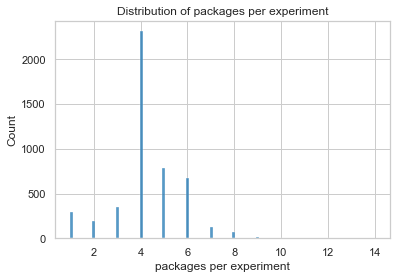

In [6]:
for_distribution = data.groupby('clickability_test_id').count()
sns.histplot(data=for_distribution['created_at'], bins=100)
plt.xlabel('packages per experiment')
plt.title('Distribution of packages per experiment')

### 1.3 A common way to measure success in online A/B tests is what is called “the clickthrough rate.” Given that often A/B tests are created to find what engages users (here, “packages” of headlines, images, etc), we would expect that a “good” package makes people click often. Create a column named ctr by dividing the number of clicks a package received (clicks column) by the number of impressions it received (impressions column).

In [7]:
data['ctr'] = data['clicks'] / data['impressions']
print('The visualization is at below:')
data[['clicks', 'impressions', 'ctr']].head()

The visualization is at below:


,clicks,impressions,ctr
0,150,3052,0.049148
1,90,3526,0.025525
2,120,3506,0.034227
3,98,3380,0.028994
4,75,3465,0.021645


### 1.4 Packages varied any combination of the headline (headline column), the excerpt (excerpt), the first sentence of the article (lede), and the image that illustrates the news piece (eyecatcher_id, a hash per image). But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. Print the length of this new dataframe and how many experiments were discarded in the filtering process.

- The length of this new dataframe is 2568.
- 2236 experiments were discarded in the filtering process.


In [8]:
# find one headline
one_headline = data.groupby('clickability_test_id').nunique()
one_headline = pd.DataFrame(one_headline.to_records())
one_headline_name = one_headline[one_headline['headline'] > 1]['clickability_test_id']
filter_one_headline = data.loc[data['clickability_test_id'].isin(one_headline_name)]
num_of_experiments_one_headline = filter_one_headline.clickability_test_id.nunique()
print(f'The length of this new dataframe is {num_of_experiments_one_headline}.')
print(f'{num_of_experiments - num_of_experiments_one_headline} experiments were discarded in the filtering process.')

The length of this new dataframe is 2586.
2236 experiments were discarded in the filtering process.


### 1.5 For comparison, repeat the procedure described in T1.4 with the eyecatcher_id column, i.e., create a dataframe considering only experiments that vary the image. Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.
- The length of this new dataframe is 3108.
- 1714 experiments were discarded in the filtering process.

In [9]:
# find one headline
one_image = data.groupby('clickability_test_id').nunique()
one_image = pd.DataFrame(one_image.to_records())
one_image_name = one_image[one_image['eyecatcher_id'] > 1]['clickability_test_id']
filter_one_image = data.loc[data['clickability_test_id'].isin(one_image_name)]
num_of_experiments_one_image = filter_one_image.clickability_test_id.nunique()
print(f'The length of this new dataframe is {num_of_experiments_one_image}.')
print(f'{num_of_experiments - num_of_experiments_one_image} experiments were discarded in the filtering process.')

The length of this new dataframe is 1714.
3108 experiments were discarded in the filtering process.


In [10]:
# experiments_one_image = data.groupby('clickability_test_id').filter(lambda x: x['eyecatcher_id'].count()==1)
# num_of_experiments_one_image = experiments_one_image.shape[0]
# print(f'The length of this new dataframe is {num_of_experiments - num_of_experiments_one_image}.')
#
# num_of_experiments_discarded = experiments_one_image.shape[0]
# print(f'{num_of_experiments_discarded} experiments were discarded in the filtering process.')

### 1.6 Discuss: Considering the answers to questions T1.4 and T1.4, what can we say about the different versions of the news tested by Upworthy?
Answer: The numbers of news with one headline and one image are roughly the same.

### 1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece.
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`.
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`).
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  the rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

In [11]:
data_ = data.copy()
# to prevent only 1 headline
data_= data_.groupby('clickability_test_id').filter(lambda x: x['headline'].count()>1)
data_same_id_lede_diff_headline1 = data_[['clickability_test_id', 'eyecatcher_id','lede','excerpt','headline','ctr','created_at']]
data_same_id_lede_diff_headline1 = data_same_id_lede_diff_headline1.set_index(['clickability_test_id', 'eyecatcher_id','lede','excerpt']).sort_index()
data_same_id_lede_diff_headline2 = data_[['clickability_test_id', 'eyecatcher_id','lede','excerpt','headline','ctr','created_at']]
data_same_id_lede_diff_headline2 = data_same_id_lede_diff_headline2.set_index(['clickability_test_id', 'eyecatcher_id','lede','excerpt',]).sort_index()
data_same_id_lede_diff_headline1.rename(columns={'headline':'headline1', 'ctr':'ctr1','created_at':'date_created'}, inplace=True)
data_same_id_lede_diff_headline2.rename(columns={'headline':'headline2', 'ctr':'ctr2','created_at':'date_created'}, inplace=True)
# merge the two almost same dataframe to get the new dataset
new_dataset = pd.merge(data_same_id_lede_diff_headline1, data_same_id_lede_diff_headline2, left_index=True, right_index=True)
mask = new_dataset['headline1'] == new_dataset['headline2']
# delete meaningless lines
new_dataset = new_dataset[~mask]
# since every pair will appear twice we will just delete the lines that ctr1 < ctr2
mask2 = new_dataset['ctr2'] >= new_dataset['ctr1']
new_dataset = new_dataset[~mask2]
# swap ctr1 and ctr2 with the correct order
# id_ = 0
# for idx, row in new_dataset.iterrows():
#     smaller, greater = 0, 0
#     smaller = min(row.ctr1, row.ctr2)
#     greater = max(row.ctr1, row.ctr2)
#     index = row.index
#     r = row.copy()
#     if row.ctr1 < row.ctr2:
#         new_dataset[index]['ctr1'] = greater
#         new_dataset[index]['ctr2'] = smaller
#         g_head = r.headline2
#         s_head = r.headline1
#         new_dataset[index]['headline1'] = g_head
#         new_dataset[index]['headline1'] = s_head
new_dataset.drop_duplicates(inplace=True)
new_dataset.rename(columns={'date_created_x': 'date_created'}, inplace=True)
new_dataset = new_dataset.drop(columns='date_created_y', axis=1)
print(f'The length of this new dataset is {len(new_dataset)}.')

new_dataset.head(100)


The length of this new dataset is 17727.


headline1  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                                                                 
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting...  Mr. President, I'm Not Mad. I'm Just Disappoin...   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.       MAD RESPECT: This Brave Woman Is Running For P...   
                                                                                                     You don't want to miss this incredible story.       If You Think Hillary Had A Rough Campaign, You...   
                                                                                                     You don't want to miss this incredible story.       If You Think Hillary Had A Rough Campaign, You...   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i...  Sean Hannity Thinks Telling Men Not To Attack ...   
...                                                                                                                                                                                                    ...   
5143608a220cb800020009c0 5332ba631fae79f09f0033f7 <p>You won't <b>believe</b> what happened to th... Jasmine's gonna need more than 3 wishes to get ...  Politically Correct Alternate Endings To Princ...   
                                                                                                     Jasmine's gonna need more than 3 wishes to get ...  Politically Correct Alternate Endings To Princ...   
                                                                                                     Jasmine's gonna need more than 3 wishes to get ...  LOL: Politically Correct Alternate Endings To ...   
                                                                                                     Jasmine's gonna need more than 3 wishes to get ...  LOL: Politically Correct Alternate Endings To ...   
                                                                                                     Jasmine's gonna need more than 3 wishes to get ...  The Disturbing True Story Of What Happens In D...   

                                                                                                                                                             ctr1  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                        
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting...  0.019770   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.       0.011216   
                                                                                                     You don't want to miss this incredible story.       0.012807   
                                                                                                     You don't want to miss this incredible story.       0.012807   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i...  0.013675   
...                                                                                                                                                           ...   
5143608a220cb800020009c0 5332ba631fae79f09f0033f7 <p>You won't <b>believe</b> what happened to th... Jasmine's gonna need more than 3 wishes to get ...  0.021062   
                             

The length is 17727

### 1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (ctr1) and the least clicked-through headline (ctr2), as well as the average clickthrough rate for the least clicked through headline (ctr2).

In [12]:
avg_diff_per_pair = (new_dataset['ctr1'].values - new_dataset['ctr2'].values).mean()
avg_ctr2 = new_dataset['ctr2'].values.mean()
print(f'The average difference per pair between the most clicked-through (ctr1) and the least clicked-through headline (ctr2) is {avg_diff_per_pair}.\nThe average clicked-through rate for the least clicked through headline (ctr2) is {avg_ctr2}.')

The average difference per pair between the most clicked-through (ctr1) and the least clicked-through headline (ctr2) is 0.004116426877032496.
The average clicked-through rate for the least clicked through headline (ctr2) is 0.010691857228802414.


### 1.9 Discuss: Considering your answer to T1.8, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

Answer: I do think that headlines are impactful in the news business, since a good headline increased about 40% percent of clicked-through rate for the same news on average, it is really a large portion.

## Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data.
We start this task from the dataset obtained in **T1.7**.
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline.
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser."
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)

2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test).
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise.
Your code should be agnostic to lower/upper case.

2.3 One easy way to classify sentiment is simply to match negative or positive words.
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.

[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

---

**Comments**

- For **T2.3**, beware of encodings!

### 2.1 Using the function provided below, count the number of words in each headline, creating columns numwords1 and numwords2 corresponding to the number of words in the winner and loser headlines.

In [13]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))
str_test = "How many words are here?"
print(str_test, count_words_simple(str_test))


How many words are here? 5


In [14]:
# initialization
new_dataset['numwords1'] = [count_words_simple(x) for x in new_dataset['headline1']]
new_dataset['numwords2'] = [count_words_simple(x) for x in new_dataset['headline2']]
new_dataset = new_dataset[['headline1', 'ctr1', 'date_created', 'numwords1', 'headline2', 'ctr2', 'numwords2']]
new_dataset.head(10)

headline1  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                                                                 
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting...  Mr. President, I'm Not Mad. I'm Just Disappoin...   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.       MAD RESPECT: This Brave Woman Is Running For P...   
                                                                                                     You don't want to miss this incredible story.       If You Think Hillary Had A Rough Campaign, You...   
                                                                                                     You don't want to miss this incredible story.       If You Think Hillary Had A Rough Campaign, You...   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i...  Sean Hannity Thinks Telling Men Not To Attack ...   
                                                                                                     Science can be confusing if you don't believe i...  Feminist Confuses Fox News Host By Suggesting ...   
                                                                                                     Science can be confusing if you don't believe i...  Feminist Confuses Fox News Host By Suggesting ...   
5143606e220cb800020006ba 5332b5951fae79f09f000632 Kate Makkai answers a question she's had since ... This woman answers a question she's had since s...  Now For Sale: Daughters, $10,000 Each (If They...   
                                                                                                     This woman answers a question she's had since s...  Why Doesn't This Woman Want Her Daughter To Be...   
                                                                                                     This woman answers a question she's had since s...  Why Doesn't This Woman Want Her Daughter To Be...   

                                                                                                                                                             ctr1  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                        
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting...  0.019770   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.       0.011216   
                                                                                                     You don't want to miss this incredible story.       0.012807   
                                                                                                     You don't want to miss this incredible story.       0.012807   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i...  0.013675   
                                                                                                     Science can be confusing if you don't believe i...  0.024444   
                                                                                                     Science can be confusing if you don't believe i...  0.024444   
5143606e220cb800020006ba 5332b5951fae79f09f000632 Kate Makkai answers a question she's had since ... This woman answers a question she's had since s...  0.034099   
                                                                      

### 2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns first_person_singular1 and first_person_singular2 for the headlines in each A/B test). Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. Your code should be agnostic to lower/upper case.

In [15]:
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

In [96]:
# Function to extract words from string
import re
def extract_word(sentence: str):
    '''take a sentence in and then return the list of words without punctuation'''
    sentence = re.findall(r'[\w]+', sentence)
    s = []
    for word in sentence:
        s.append(str(word).lower())
    return s
str_ ="I am a fucking idiot. But I love Iris. How sarcastic!"
print(extract_word(str_))

['i', 'am', 'a', 'fucking', 'idiot', 'but', 'i', 'love', 'iris', 'how', 'sarcastic']


In [17]:
# Function to extract words from string
import re
def extract_word(sentence: str):
    '''take a sentence in and then return the list of words without punctuation'''
    sentence = re.findall(r'[\w]+', sentence)
    s = []
    for word in sentence:
        s.append(str(word).lower())
    return s
def check_existence(feature_wordsets:dict, headline:str):
    '''Return the list that used to generate the indicator variables'''
    list = [0,0,0,0,0]
    sentence = extract_word(headline)
    fs, fp, sp, ts, tp = False, False, False, False, False
    # print(sentence)
    # print('\n')
    for word in sentence:
        fs, fp, sp, ts, tp = False, False, False, False, False
        if (word in feature_wordsets['first_person_singular']) & (fs == False) :
            list[0] = 1
            fs = True
        if (word in feature_wordsets['first_person_plural']) & (fp == False):
            list[1] = 1
            fp = True
        if (word in feature_wordsets['second_person']) & (sp == False):
            list[2] = 1
            sp =True
        if (word in feature_wordsets['third_person_singular']) & (ts == False):
            list[3] = 1
            ts = True
        if (word in feature_wordsets['third_person_plural']) & (tp == False):
            list[4] = 1
            tp = True
    return list

In [18]:
# testing
[check_existence(feature_wordsets, x) for x in new_dataset.headline1[:5]]

[[1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0]]

In [19]:
new_dataset[['first_person_singular1', 'first_person_plural1', 'second_person1', 'third_person_singular1', 'third_person_plural1']] = [check_existence(feature_wordsets, x) for x in new_dataset.headline1]
new_dataset[['first_person_singular2', 'first_person_plural2', 'second_person2', 'third_person_singular2', 'third_person_plural2']] = [check_existence(feature_wordsets, x) for x in new_dataset.headline2]
new_dataset = new_dataset[['headline1', 'ctr1', 'date_created', 'numwords1', 'first_person_singular1', 'first_person_plural1', 'second_person1', 'third_person_singular1', 'third_person_plural1', 'headline2', 'ctr2', 'numwords2',  'first_person_singular2', 'first_person_plural2', 'second_person2', 'third_person_singular2', 'third_person_plural2']]


2349

In [20]:
new_dataset.head(10)

headline1  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                                                                 
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting...  Mr. President, I'm Not Mad. I'm Just Disappoin...   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.       MAD RESPECT: This Brave Woman Is Running For P...   
                                                                                                     You don't want to miss this incredible story.       If You Think Hillary Had A Rough Campaign, You...   
                                                                                                     You don't want to miss this incredible story.       If You Think Hillary Had A Rough Campaign, You...   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i...  Sean Hannity Thinks Telling Men Not To Attack ...   
                                                                                                     Science can be confusing if you don't believe i...  Feminist Confuses Fox News Host By Suggesting ...   
                                                                                                     Science can be confusing if you don't believe i...  Feminist Confuses Fox News Host By Suggesting ...   
5143606e220cb800020006ba 5332b5951fae79f09f000632 Kate Makkai answers a question she's had since ... This woman answers a question she's had since s...  Now For Sale: Daughters, $10,000 Each (If They...   
                                                                                                     This woman answers a question she's had since s...  Why Doesn't This Woman Want Her Daughter To Be...   
                                                                                                     This woman answers a question she's had since s...  Why Doesn't This Woman Want Her Daughter To Be...   

                                                                                                                                                             ctr1  \
clickability_test_id     eyecatcher_id            lede                                               excerpt                                                        
51436069220cb800020005bd 5332ba141fae79f09f002c47 <p>The President made a lot of promises, and he... You have so much potential. Why are you wasting...  0.019770   
5143606a220cb800020005c6 5332ba211fae79f09f002dcf <p>If you think Fawzia Koofi is crazy for wanti... You don't want to miss this incredible story.       0.011216   
                                                                                                     You don't want to miss this incredible story.       0.012807   
                                                                                                     You don't want to miss this incredible story.       0.012807   
5143606b220cb800020005d7 5332ba581fae79f09f003326 <p><p>Sean Hannity thinks all women should have... Science can be confusing if you don't believe i...  0.013675   
                                                                                                     Science can be confusing if you don't believe i...  0.024444   
                                                                                                     Science can be confusing if you don't believe i...  0.024444   
5143606e220cb800020006ba 5332b5951fae79f09f000632 Kate Makkai answers a question she's had since ... This woman answers a question she's had since s...  0.034099   
                                                                      

### 2.3 One easy way to classify sentiment is simply to match negative or positive words. Use the linked lists of words (positive, negative) to obtain “positive sentiment” and “negative sentiment” scores for each headline. Create columns positive1/positive2 and negative1/negative2 containing indicator variables for positive and negative sentiment, i.e., A headline has a “positive sentiment” (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its “positive sentiment” (or negative) score equals 0.

In [21]:
# Grab the Data from the internet
import requests

In [22]:
# for positive word list
positive_words = requests.get('https://ptrckprry.com/course/ssd/data/positive-words.txt')
positive_words = list(str(positive_words.text).split('\n'))
count = 0
for word in positive_words:
    if word == 'a+':
        break
    count += 1
positive_words = positive_words[count:]
# for negative word list
negative_words = requests.get('https://ptrckprry.com/course/ssd/data/negative-words.txt')
negative_words = list(str(negative_words.text).split('\n'))
count = 0
for word in negative_words:
    if word == '2-faced':
        break
    count += 1
negative_words = negative_words[count:]

In [87]:
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [23]:
# function to count positive and negative words
def sentiment_score(positive:bool,sentence: str, positive_words: list =positive_words, negative_words: list =negative_words):
    """Takes in the sentence and then
    returns the score of positive and negative words."""
    count = 0
    sentence = extract_word(sentence)
    if positive:
        list = positive_words
    else:
        list = negative_words
    for word in sentence:
        if word in list:
            count = 1
            break
    return count

In [24]:
load = True
if not load:
    new_dataset['positive1'] = [sentiment_score(True, x) for x in new_dataset.headline1]
    new_dataset['positive2'] = [sentiment_score(True, x) for x in new_dataset.headline2]
    new_dataset['negative1'] = [sentiment_score(False, x) for x in new_dataset.headline1]
    new_dataset['negative2'] = [sentiment_score(False, x) for x in new_dataset.headline2]
else:
    new_dataset = pd.read_csv(os.path.join(data_path_root,'new_dataset.csv'))

In [25]:
new_dataset = new_dataset[['headline1', 'ctr1', 'date_created', 'numwords1', 'first_person_singular1', 'first_person_plural1', 'second_person1', 'third_person_singular1', 'third_person_plural1', 'positive1', 'negative1', 'headline2', 'ctr2', 'numwords2',  'first_person_singular2', 'first_person_plural2', 'second_person2', 'third_person_singular2', 'third_person_plural2', 'positive2', 'negative2']]
if not os.path.exists(os.path.join(data_path_root,'new_dataset.csv')):
    to_save = new_dataset.to_csv(os.path.join(data_path_root,'new_dataset.csv'))

In [80]:
new_dataset.head(100)

,headline1,ctr1,date_created,numwords1,first_person_singular1,first_person_plural1,second_person1,third_person_singular1,third_person_plural1,positive1,...,headline2,ctr2,numwords2,first_person_singular2,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive2,negative2
0,"Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,2013-02-07 05:42:25,9,1,0,0,0,0,0,...,"Mr. President, I'm Not Mad. I'm Just Disappoin...",0.016595,15,1,0,0,0,0,0,1
1,MAD RESPECT: This Brave Woman Is Running For P...,0.011216,2013-02-19 19:05:45,17,0,0,0,0,0,1,...,This Brave Woman Is Running For President Of A...,0.009410,11,0,0,0,0,0,1,0
2,"If You Think Hillary Had A Rough Campaign, You...",0.012807,2013-02-19 19:03:39,15,0,0,1,0,0,0,...,MAD RESPECT: This Brave Woman Is Running For P...,0.011216,17,0,0,0,0,0,1,1
3,"If You Think Hillary Had A Rough Campaign, You...",0.012807,2013-02-19 19:03:39,15,0,0,1,0,0,0,...,This Brave Woman Is Running For President Of A...,0.009410,11,0,0,0,0,0,1,0
4,Sean Hannity Thinks Telling Men Not To Attack ...,0.013675,2013-03-09 06:55:39,11,0,0,0,0,0,0,...,Sean Hannity Thinks Its Waaaaay Too Hard To Te...,0.013050,14,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Politically Correct Alternate Endings To Princ...,0.021062,2013-03-14 20:35:36,13,0,0,1,0,0,1,...,The Disturbing True Story Of What Happens In D...,0.016571,14,0,0,0,0,0,1,1
96,Politically Correct Alternate Endings To Princ...,0.021062,2013-03-14 20:35:36,13,0,0,1,0,0,1,...,Disney Movies Tend To End In Lies. Here's What...,0.012496,11,0,0,0,0,0,0,1
97,LOL: Politically Correct Alternate Endings To ...,0.018564,2013-03-14 20:36:15,14,0,0,1,0,0,1,...,The Disturbing True Story Of What Happens In D...,0.016571,14,0,0,0,0,0,1,1
98,LOL: Politically Correct Alternate Endings To ...,0.018564,2013-03-14 20:36:15,14,0,0,1,0,0,1,...,Disney Movies Tend To End In Lies. Here's What...,0.012496,11,0,0,0,0,0,0,1


In [97]:
np.sum(new_dataset['positive1']==1)

8329

## Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

3.2 **Discuss:** Are longer headlines more successful? Justify.

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$
    
3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.
    
3.7 **Discuss:** When are paired t-tests helpful? Justify.

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average and 95% confidence intervals for:
- the ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.
    
---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

### 3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see scipy.stats; for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

In [27]:
from statsmodels.stats import diagnostic
from scipy import stats

In [28]:
win_num_word = new_dataset.numwords1
lose_num_word = new_dataset.numwords2
t_test_ind = stats.ttest_ind(win_num_word, lose_num_word, equal_var=True)
print(t_test_ind)
print(win_num_word.mean(), lose_num_word.mean())

Ttest_indResult(statistic=8.474890728758453, pvalue=2.442511064669354e-17)
15.092909121678796 14.81525356800361


In [29]:
t_test_paired = stats.ttest_rel(win_num_word, lose_num_word)
print(t_test_paired)

Ttest_relResult(statistic=10.208663781647644, pvalue=2.118549790803972e-24)


In [30]:
diff_in_num_of_words = win_num_word.mean() - lose_num_word.mean()
print(f'The mean difference between the number of words in the winner and the loser headlines is {diff_in_num_of_words}.')

The mean difference between the number of words in the winner and the loser headlines is 0.277655553675185.


### 3.2 Discuss: Are longer headlines more successful? Justify.

We cannot say that longer headlines are more successful, since by the previous two t-tests we can reject that the length of the winner is longer than the length of the loser, so there is no way to say that.

### 3.3 The t-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use numpy.random to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$

### 3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)


In [77]:
## 3.3
X = np.random.uniform(0, 1, 30)
Y = np.random.uniform(0, 1, 30)
Z = X/2 + Y/2 + 0.1
K = Y + 0.1

3.4)  The expected values of $X, Y, Z, K$ are 0.5, 0.5, 1.1, 1.1 respectively, while the variances are 1/12, 1/12, 1/12, 1/12 respectively.

### 3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each).
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

In [67]:
simulation_10000 = []
for i in range(10000):
    idx = 'sim_#' + str(1 + i)
    X = np.random.uniform(0, 1, 30)
    Y = np.random.uniform(0, 1, 30)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1
    t_ind_X_Z = stats.ttest_ind(X, Z, equal_var=True)
    t_ind_X_K = stats.ttest_ind(X, K, equal_var=True)
    t_red_X_Z = stats.ttest_rel(X, Z)
    t_red_X_K = stats.ttest_rel(X, K)
    l = [t_ind_X_Z.pvalue, t_ind_X_K.pvalue, t_red_X_Z.pvalue, t_red_X_K.pvalue]
    simulation_10000.append(l)
simulation_10000_df = pd.DataFrame(simulation_10000)

In [75]:
simulation_10000_df.head()

,0,1,2,3
0,0.068550,0.085153,0.004466,0.086139
1,0.148034,0.148818,0.013327,0.170095
2,0.178078,0.425103,0.069495,0.484379
3,0.735260,0.391125,0.551067,0.376898
4,0.061811,0.041602,0.003681,0.064940


In [76]:
np.mean(simulation_10000_df[simulation_10000_df<0.05], axis=0)

0    0.025798
1    0.018680
2    0.010680
3    0.018866
dtype: float64

### 3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.

### 3.7 **Discuss:** When are paired t-tests helpful? Justify.

In [34]:
## 3.6
indep_t_X_Z = stats.ttest_ind(X, Z, equal_var=True)
paired_t_X_Z = stats.ttest_rel(X, Z)
indep_t_X_K = stats.ttest_ind(X, K, equal_var=True)
paired_t_X_K = stats.ttest_rel(X, K)
print('The p-values for them are {}, {}, {}, {} respectively'.format(indep_t_X_Z.pvalue, paired_t_X_Z.pvalue, indep_t_X_K.pvalue, paired_t_X_K.pvalue))


The p-values for them are 0.07202320680817863, 0.005624510105309113, 0.08169737984746285, 0.09285941475542824 respectively


3.7) Paired sample t-test is a statistical technique that is used to compare two population means in the case of two samples that are correlated.

### 3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
The mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines). the difference in usage of positive words between winner and loser headlines. the difference in usage of negative words between winner and loser headlines. The difference in usage of each type of pronoun between winner and loser headlines.
### 3.9 Discuss: According to the results obtained in T3.8, what headlines grab people’s attention the most? Justify your answer

In [35]:
# The bootstrapping function to use
def bootstrapping(array, num_of_iters: int, sample_rate: float, confidence_level: float, value='mean', replace=True,test=False):
    """array: takes in an array of your concern(numpy array)
        num_of_iters: the number of iterations you want to bootstrap
        sample_rate: the percentage of data to be sampled each time
        confidence_level: the confidence interval, e.g. 95%(input as 0.95)
        value: which value to calculate(be bootstrapped) mean / median
        replace: takes a boolean, if we will replace or not

        output: e.g. 95% confidence intervals of the mean

        Author: ZHANG Yuyao
        """
    if test:
        # array = np.array(array)
        if value=='mean':
            true_value = np.mean(array)
        elif value == 'median':
            true_value = np.median(array)
        print(f'The true value of {value} is {true_value}')

    sample_value = []
    data_len = len(array)
    sample_len = int(data_len*sample_rate)
    for i in range(num_of_iters):
        y = np.random.choice(array.tolist(), sample_len, replace=replace)
        if value=='mean':
            value_ = np.mean(y)
        elif value == 'median':
            value_ = np.median(y)
        sample_value.append(value_)

    bs_value = np.mean(sample_value)

    alpha = 1-confidence_level
    sample_value = np.sort(sample_value)

    left = np.percentile(sample_value, alpha*50)#(100/2)
    right = np.percentile(sample_value, 100-alpha*50)

    print(f'The {value} is {bs_value}.\nAnd the {confidence_level} confidence interval for that is: ({left}, {right}).')
    return bs_value, left, right

In [36]:
ratio_w_l_num_words = new_dataset.numwords1 / new_dataset.numwords2
print('The mean ratio between the number of words in the winner headline and the loser headline:')
ratio_mean, left_interval, right_interval = bootstrapping(ratio_w_l_num_words, num_of_iters=10000, confidence_level=0.95, value='mean', sample_rate=0.05)

The mean ratio between the number of words in the winner headline and the loser headline:
The mean is 1.0622252367015372.
And the 0.95 confidence interval for that is: (1.0418435299600448, 1.0835854412509427).


In [37]:
diff_in_pos_words = new_dataset.positive1 - new_dataset.positive2
print('The mean difference in usage of positive words between winner and loser headlines.')
ratio_mean, left_interval, right_interval = bootstrapping(diff_in_pos_words, num_of_iters=10000, confidence_level=0.95, value='mean', sample_rate=0.05)

The mean difference in usage of positive words between winner and loser headlines.
The mean is -0.00225372460496614.
And the 0.95 confidence interval for that is: (-0.04288939051918736, 0.03837471783295711).


In [38]:
diff_in_neg_words = new_dataset.negative1 - new_dataset.negative2
print('The mean difference in usage of negative words between winner and loser headlines.')
ratio_mean, left_interval, right_interval = bootstrapping(diff_in_neg_words, num_of_iters=10000, confidence_level=0.95, value='mean', sample_rate=0.05)

The mean difference in usage of negative words between winner and loser headlines.
The mean is 0.017093227990970655.
And the 0.95 confidence interval for that is: (-0.02144469525959368, 0.055304740406320545).


In [39]:
diff_in_fps = new_dataset.first_person_singular1 - new_dataset.first_person_singular2
print('The mean difference in usage of first_person_singular between winner and loser headlines.')
ratio_mean, left_interval, right_interval = bootstrapping(diff_in_fps, num_of_iters=10000, confidence_level=0.95, value='mean', sample_rate=0.05)

The mean difference in usage of first_person_singular between winner and loser headlines.
The mean is 0.015156546275395033.
And the 0.95 confidence interval for that is: (-0.011286681715575621, 0.0417607223476298).


In [40]:
diff_in_fpp = new_dataset.first_person_plural1 - new_dataset.first_person_plural2
print('The mean difference in usage of first_person_plural between winner and loser headlines.')
ratio_mean, left_interval, right_interval = bootstrapping(diff_in_fpp, num_of_iters=10000, confidence_level=0.95, value='mean', sample_rate=0.05)

The mean difference in usage of first_person_plural between winner and loser headlines.
The mean is -0.010983860045146726.
And the 0.95 confidence interval for that is: (-0.03724604966139955, 0.014672686230248307).


In [41]:
diff_in_sp = new_dataset.second_person1 - new_dataset.second_person2
print('The mean difference in usage of second person between winner and loser headlines.')
ratio_mean, left_interval, right_interval = bootstrapping(diff_in_sp, num_of_iters=10000, confidence_level=0.95, value='mean', sample_rate=0.05)

The mean difference in usage of second person between winner and loser headlines.
The mean is 0.006259142212189617.
And the 0.95 confidence interval for that is: (-0.028216704288939052, 0.040632054176072234).


In [42]:
diff_in_tps = new_dataset.third_person_singular1 - new_dataset.third_person_singular2
print('The mean difference in usage of third person singular between winner and loser headlines.')
ratio_mean, left_interval, right_interval = bootstrapping(diff_in_tps, num_of_iters=10000, confidence_level=0.95, value='mean', sample_rate=0.05)

The mean difference in usage of third person singular between winner and loser headlines.
The mean is 0.03211896162528217.
And the 0.95 confidence interval for that is: (-0.006772009029345372, 0.07110609480812641).


In [43]:
diff_in_tpp = new_dataset.third_person_plural1 - new_dataset.third_person_plural2
print('The mean difference in usage of third person plural between winner and loser headlines.')
ratio_mean, left_interval, right_interval = bootstrapping(diff_in_tpp, num_of_iters=10000, confidence_level=0.95, value='mean', sample_rate=0.05)

The mean difference in usage of third person plural between winner and loser headlines.
The mean is 0.0023469525959367945.
And the 0.95 confidence interval for that is: (-0.02708803611738149, 0.030474040632054177).


3.9) Shorter, more negative headlines with more use of third-person plural pronouns seems to be better at grab people's attention.

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (I am amazed!), but dislike headlines with negative words and first person pronouns (I am sad!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


### 4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

In [44]:
# The bootstrapping function to use
def bootstrapping(array, num_of_iters: int, sample_rate: float, confidence_level: float, value='mean', replace=True,test=False):
    """array: takes in an array of your concern(numpy array)
        num_of_iters: the number of iterations you want to bootstrap
        sample_rate: the percentage of data to be sampled each time
        confidence_level: the confidence interval, e.g. 95%(input as 0.95)
        value: which value to calculate(be bootstrapped) mean / median
        replace: takes a boolean, if we will replace or not

        output: e.g. 95% confidence intervals of the mean

        Author: ZHANG Yuyao
        """
    if test:
        # array = np.array(array)
        if value=='mean':
            true_value = np.mean(array)
        elif value == 'median':
            true_value = np.median(array)
        print(f'The true value of {value} is {true_value}')

    sample_value = []
    data_len = len(array)
    sample_len = int(data_len*sample_rate)
    for i in range(num_of_iters):
        y = np.random.choice(array.tolist(), sample_len, replace=replace)
        if value=='mean':
            value_ = np.mean(y)
        elif value == 'median':
            value_ = np.median(y)
        sample_value.append(value_)

    bs_value = np.mean(sample_value)

    alpha = 1-confidence_level
    sample_value = np.sort(sample_value)

    left = np.percentile(sample_value, alpha*50)#(100/2)
    right = np.percentile(sample_value, 100-alpha*50)

    # print(f'The {value} is {bs_value}.\nAnd the {confidence_level} confidence interval for that is: ({left}, {right}).')
    return bs_value, left, right

In [45]:
df_4 = new_dataset[new_dataset.date_created >= '2013-04-01 00:00:00'].copy()
df_4.shape

(17497, 21)

In [46]:
df_4['date_created_by_month'] = df_4.date_created.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m'))

In [47]:
stats_num_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'num_words_win_avg': bootstrapping(x['numwords1'], 1000, 0.1, 0.95)[0], 'win_left':bootstrapping(x['numwords1'], 1000, 0.1, 0.95)[1], 'win_right':bootstrapping(x['numwords1'], 1000, 0.1, 0.95)[2],'num_words_lose_avg': bootstrapping(x['numwords2'], 1000, 0.1, 0.95)[0], 'lose_left':bootstrapping(x['numwords2'], 1000, 0.1, 0.95)[1], 'lose_right':bootstrapping(x['numwords2'], 1000, 0.1, 0.95)[2]}))

In [48]:
stats_num_by_time.head()

,num_words_win_avg,win_left,win_right,num_words_lose_avg,lose_left,lose_right
date_created_by_month,,,,,,
2013-04,13.597900,12.200000,14.950000,13.051250,11.650000,14.450000
2013-05,13.956118,12.058824,15.764706,14.312529,12.647059,16.176471
2013-06,14.354643,13.547619,15.143452,14.034643,13.214286,14.929167
2013-07,15.185132,14.236842,16.157895,14.898395,13.921053,15.894737
2013-08,14.057941,13.058088,14.970588,13.491235,12.382353,14.588235


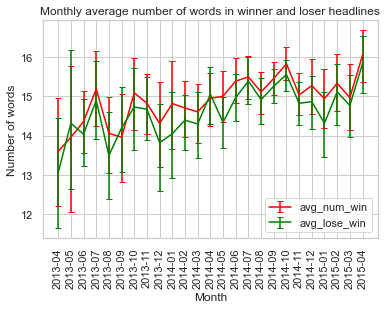

In [49]:
plt.errorbar(stats_num_by_time.index, stats_num_by_time.num_words_win_avg, yerr = [stats_num_by_time.num_words_win_avg-stats_num_by_time.win_left,stats_num_by_time.win_right-stats_num_by_time.num_words_win_avg], capsize=3, label='avg_num_win', color='red')
plt.errorbar(stats_num_by_time.index, stats_num_by_time.num_words_lose_avg, yerr = [stats_num_by_time.num_words_lose_avg-stats_num_by_time.lose_left,stats_num_by_time.lose_right-stats_num_by_time.num_words_lose_avg], capsize=3, label='avg_lose_win', color='green')
plt.tick_params(axis='x', rotation=90)
plt.title('Monthly average number of words in winner and loser headlines')
plt.ylabel('Number of words')
plt.xlabel('Month')
plt.tick_params(axis='x', rotation=90)
plt.legend()

### 4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in T4.1, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines). Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

In [110]:
#'Monthly average number of first_person_singular pronouns in winner and loser headlines'
fps_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'first_person_singular1_avg': bootstrapping(x['first_person_singular1'], 1000, 0.1, 0.95)[0], 'win_left':bootstrapping(x['first_person_singular1'], 1000, 0.1, 0.95)[1], 'win_right':bootstrapping(x['first_person_singular2'], 1000, 0.1, 0.95)[2],'first_person_singular2_avg': bootstrapping(x['first_person_singular2'], 1000, 0.1, 0.95)[0], 'lose_left':bootstrapping(x['first_person_singular2'], 1000, 0.1, 0.95)[1], 'lose_right':bootstrapping(x['first_person_singular2'], 1000, 0.1, 0.95)[2]}))

#'Monthly average number of first_person_plural pronouns in winner and loser headlines'
fpp_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'first_person_plural1_avg': bootstrapping(x['first_person_plural1'], 1000, 0.1, 0.95)[0], 'win_left':bootstrapping(x['first_person_plural1'], 1000, 0.1, 0.95)[1], 'win_right':bootstrapping(x['first_person_plural2'], 1000, 0.1, 0.95)[2],'first_person_plural2_avg': bootstrapping(x['first_person_plural2'], 1000, 0.1, 0.95)[0], 'lose_left':bootstrapping(x['first_person_plural2'], 1000, 0.1, 0.95)[1], 'lose_right':bootstrapping(x['first_person_plural2'], 1000, 0.1, 0.95)[2]}))

#'Monthly average number of second_person pronouns in winner and loser headlines'
sp_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'second_person1_avg': bootstrapping(x['second_person1'], 1000, 0.1, 0.95)[0], 'win_left':bootstrapping(x['second_person1'], 1000, 0.1, 0.95)[1], 'win_right':bootstrapping(x['second_person2'], 1000, 0.1, 0.95)[2],'second_person2_avg': bootstrapping(x['second_person2'], 1000, 0.1, 0.95)[0], 'lose_left':bootstrapping(x['second_person2'], 1000, 0.1, 0.95)[1], 'lose_right':bootstrapping(x['second_person2'], 1000, 0.1, 0.95)[2]}))

#'Monthly average number of third_person_singular pronouns in winner and loser headlines'
tps_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'third_person_singular1_avg': bootstrapping(x['third_person_singular1'], 1000, 0.1, 0.95)[0], 'win_left':bootstrapping(x['third_person_singular1'], 1000, 0.1, 0.95)[1], 'win_right':bootstrapping(x['third_person_singular2'], 1000, 0.1, 0.95)[2],'third_person_singular2_avg': bootstrapping(x['third_person_singular2'], 1000, 0.1, 0.95)[0], 'lose_left':bootstrapping(x['third_person_singular2'], 1000, 0.1, 0.95)[1], 'lose_right':bootstrapping(x['third_person_singular2'], 1000, 0.1, 0.95)[2]}))

#'Monthly average number of third_person_plural pronouns in winner and loser headlines'
tpp_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'third_person_plural1_avg': bootstrapping(x['third_person_plural1'], 1000, 0.1, 0.95)[0], 'win_left':bootstrapping(x['third_person_plural1'], 1000, 0.1, 0.95)[1], 'win_right':bootstrapping(x['third_person_plural2'], 1000, 0.1, 0.95)[2],'third_person_plural2_avg': bootstrapping(x['third_person_plural2'], 1000, 0.1, 0.95)[0], 'lose_left':bootstrapping(x['third_person_plural2'], 1000, 0.1, 0.95)[1], 'lose_right':bootstrapping(x['third_person_plural2'], 1000, 0.1, 0.95)[2]}))

#Negative sentiment
neg_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'negative_words1_avg': bootstrapping(x['negative1'], 1000, 0.1, 0.95)[0], 'win_left':bootstrapping(x['negative1'], 1000, 0.1, 0.95)[1], 'win_right':bootstrapping(x['negative2'], 1000, 0.1, 0.95)[2],'negative_words2_avg': bootstrapping(x['negative2'], 1000, 0.1, 0.95)[0], 'lose_left':bootstrapping(x['negative2'], 1000, 0.1, 0.95)[1], 'lose_right':bootstrapping(x['negative2'], 1000, 0.1, 0.95)[2]}))

#Positive sentiment
pos_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'positive_words1_avg': bootstrapping(x['positive1'], 1000, 0.1, 0.95)[0], 'win_left':bootstrapping(x['positive1'], 1000, 0.1, 0.95)[1], 'win_right':bootstrapping(x['positive2'], 1000, 0.1, 0.95)[2],'positive_words2_avg': bootstrapping(x['positive2'], 1000, 0.1, 0.95)[0], 'lose_left':bootstrapping(x['positive2'], 1000, 0.1, 0.95)[1], 'lose_right':bootstrapping(x['positive2'], 1000, 0.1, 0.95)[2]}))

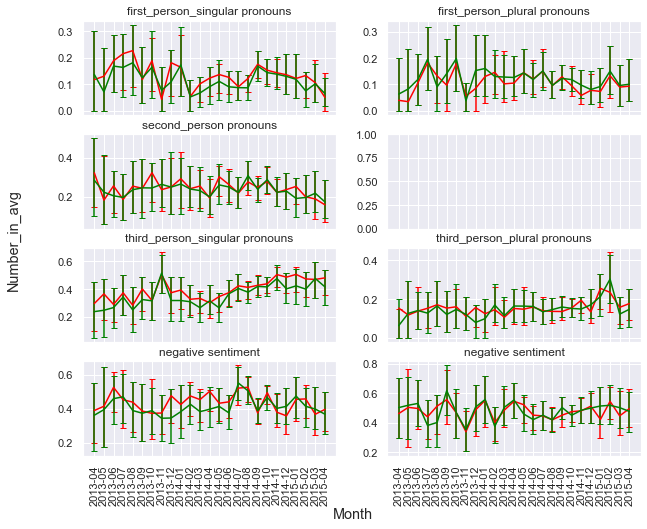

In [111]:
fig, ax = plt.subplots(4,2,figsize= (10,8), sharey=False, sharex = True)
fig.supxlabel('Month')
fig.supylabel('Number_in_avg')
#'Monthly average number of first_person_singular pronouns in winner and loser headlines'
sbplt = ax[0, 0]
sbplt.errorbar(fps_by_time.index, fps_by_time.first_person_singular1_avg, yerr = [fps_by_time.first_person_singular1_avg-fps_by_time.win_left,fps_by_time.win_right-fps_by_time.first_person_singular1_avg], capsize=3, label='avg_num_win', color='red')
sbplt.errorbar(fps_by_time.index, fps_by_time.first_person_singular2_avg, yerr = [fps_by_time.first_person_singular2_avg-fps_by_time.lose_left,fps_by_time.lose_right-fps_by_time.first_person_singular2_avg], capsize=3, label='avg_num_lose', color='green')
sbplt.set_title('first_person_singular pronouns')

#'Monthly average number of first_person_plural pronouns in winner and loser headlines'
sbplt = ax[0, 1]
sbplt.errorbar(fpp_by_time.index, fpp_by_time.first_person_plural1_avg, yerr = [fpp_by_time.first_person_plural1_avg-fpp_by_time.win_left,fpp_by_time.win_right-fpp_by_time.first_person_plural1_avg], capsize=3, label='avg_num_win', color='red')
sbplt.errorbar(fpp_by_time.index, fpp_by_time.first_person_plural2_avg, yerr = [fpp_by_time.first_person_plural2_avg-fpp_by_time.lose_left,fpp_by_time.lose_right-fpp_by_time.first_person_plural2_avg], capsize=3, label='avg_num_lose', color='green')
sbplt.set_title('first_person_plural pronouns')

#'Monthly average number of second_person pronouns in winner and loser headlines'
sbplt = ax[1, 0]
sbplt.errorbar(sp_by_time.index, sp_by_time.second_person1_avg, yerr = [sp_by_time.second_person1_avg-sp_by_time.win_left,sp_by_time.win_right-sp_by_time.second_person1_avg], capsize=3, label='avg_num_win', color='red')
sbplt.errorbar(sp_by_time.index, sp_by_time.second_person2_avg, yerr = [sp_by_time.second_person2_avg-sp_by_time.lose_left,sp_by_time.lose_right-sp_by_time.second_person2_avg], capsize=3, label='avg_num_lose', color='green')
sbplt.set_title('second_person pronouns')

#'Monthly average number of third_person_singular pronouns in winner and loser headlines'
sbplt = ax[2, 0]
sbplt.errorbar(tps_by_time.index, tps_by_time.third_person_singular1_avg, yerr = [tps_by_time.third_person_singular1_avg-tps_by_time.win_left,tps_by_time.win_right-tps_by_time.third_person_singular1_avg], capsize=3, label='avg_num_win', color='red')
sbplt.errorbar(tps_by_time.index, tps_by_time.third_person_singular2_avg, yerr = [tps_by_time.third_person_singular2_avg-tps_by_time.lose_left,tps_by_time.lose_right-tps_by_time.third_person_singular2_avg], capsize=3, label='avg_num_lose', color='green')
sbplt.set_title('third_person_singular pronouns')

# A blank part for beauty.

#'Monthly average number of third_person_plural pronouns in winner and loser headlines'
sbplt = ax[2, 1]
sbplt.errorbar(tpp_by_time.index, tpp_by_time.third_person_plural1_avg, yerr = [tpp_by_time.third_person_plural1_avg-tpp_by_time.win_left,tpp_by_time.win_right-tpp_by_time.third_person_plural1_avg], capsize=3, label='avg_num_win', color='red')
sbplt.errorbar(tpp_by_time.index, tpp_by_time.third_person_plural2_avg, yerr = [tpp_by_time.third_person_plural2_avg-tpp_by_time.lose_left,tpp_by_time.lose_right-tpp_by_time.third_person_plural2_avg], capsize=3, label='avg_num_lose', color='green')
sbplt.set_title('third_person_plural pronouns')

#Negative sentiment
sbplt = ax[3, 0]
sbplt.errorbar(neg_by_time.index, neg_by_time.negative_words1_avg, yerr = [neg_by_time.negative_words1_avg-neg_by_time.win_left,neg_by_time.win_right-neg_by_time.negative_words1_avg], capsize=3, label='avg_num_win', color='red')
sbplt.errorbar(neg_by_time.index, neg_by_time.negative_words2_avg, yerr = [neg_by_time.negative_words2_avg-neg_by_time.lose_left,neg_by_time.lose_right-neg_by_time.negative_words2_avg], capsize=3, label='avg_num_win', color='green')
sbplt.set_title('negative sentiment')

sbplt.tick_params(axis='x', rotation=90)

#Positive sentiment
sbplt = ax[3, 1]
sbplt.errorbar(pos_by_time.index, pos_by_time.positive_words1_avg, yerr = [pos_by_time.positive_words1_avg-pos_by_time.win_left,pos_by_time.win_right-pos_by_time.positive_words1_avg], capsize=3, label='avg_num_win', color='red')
sbplt.errorbar(pos_by_time.index, pos_by_time.positive_words2_avg, yerr = [pos_by_time.positive_words2_avg-pos_by_time.lose_left,pos_by_time.lose_right-pos_by_time.positive_words2_avg], capsize=3, label='avg_num_win', color='green')
sbplt.set_title('negative sentiment')

sbplt.tick_params(axis='x', rotation=90)

For another try

In [52]:
#'Monthly average number of first_person_singular pronouns in winner and loser headlines'
fps_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'first_person_singular1_avg': (bootstrapping(x['first_person_singular1'], 1000, 0.1, 0.95)[0]+bootstrapping(x['first_person_singular2'], 1000, 0.1, 0.95)[0])/2, 'win_left':(bootstrapping(x['first_person_singular1'], 1000, 0.1, 0.95)[1]+bootstrapping(x['first_person_singular2'], 1000, 0.1, 0.95)[1])/2, 'win_right':(bootstrapping(x['first_person_singular2'], 1000, 0.1, 0.95)[2]+bootstrapping(x['first_person_singular2'], 1000, 0.1, 0.95)[2])/2}))

#'Monthly average number of first_person_plural pronouns in winner and loser headlines'
fpp_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'first_person_plural1_avg': (bootstrapping(x['first_person_plural1'], 1000, 0.1, 0.95)[0]+bootstrapping(x['first_person_plural2'], 1000, 0.1, 0.95)[0])/2, 'win_left':(bootstrapping(x['first_person_plural1'], 1000, 0.1, 0.95)[1]+bootstrapping(x['first_person_plural2'], 1000, 0.1, 0.95)[1])/2, 'win_right':(bootstrapping(x['first_person_plural2'], 1000, 0.1, 0.95)[2]+bootstrapping(x['first_person_plural2'], 1000, 0.1, 0.95)[2])/2}))

#'Monthly average number of second_person pronouns in winner and loser headlines'
sp_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'second_person1_avg': (bootstrapping(x['second_person1'], 1000, 0.1, 0.95)[0]+bootstrapping(x['second_person2'], 1000, 0.1, 0.95)[0])/2, 'win_left':(bootstrapping(x['second_person1'], 1000, 0.1, 0.95)[1]+bootstrapping(x['second_person2'], 1000, 0.1, 0.95)[1])/2, 'win_right':(bootstrapping(x['second_person2'], 1000, 0.1, 0.95)[2]+bootstrapping(x['second_person2'], 1000, 0.1, 0.95)[2])/2}))

#'Monthly average number of third_person_singular pronouns in winner and loser headlines'
tps_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'third_person_singular1_avg': (bootstrapping(x['third_person_singular1'], 1000, 0.1, 0.95)[0]+bootstrapping(x['third_person_singular2'], 1000, 0.1, 0.95)[0])/2, 'win_left':(bootstrapping(x['third_person_singular1'], 1000, 0.1, 0.95)[1]+bootstrapping(x['third_person_singular2'], 1000, 0.1, 0.95)[1])/2, 'win_right':(bootstrapping(x['third_person_singular2'], 1000, 0.1, 0.95)[2]+bootstrapping(x['third_person_singular2'], 1000, 0.1, 0.95)[2])/2}))

#'Monthly average number of third_person_plural pronouns in winner and loser headlines'
tpp_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'third_person_plural1_avg': (bootstrapping(x['third_person_plural1'], 1000, 0.1, 0.95)[0]+bootstrapping(x['third_person_plural2'], 1000, 0.1, 0.95)[0])/2, 'win_left':(bootstrapping(x['third_person_plural1'], 1000, 0.1, 0.95)[1]+bootstrapping(x['third_person_plural2'], 1000, 0.1, 0.95)[1])/2, 'win_right':(bootstrapping(x['third_person_plural2'], 1000, 0.1, 0.95)[2]+bootstrapping(x['third_person_plural2'], 1000, 0.1, 0.95)[2])/2}))

#Negative sentiment
neg_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'negative_words1_avg': (bootstrapping(x['negative1'], 1000, 0.1, 0.95)[0]+bootstrapping(x['negative2'], 1000, 0.1, 0.95)[0])/2, 'win_left':(bootstrapping(x['negative1'], 1000, 0.1, 0.95)[1]+bootstrapping(x['negative2'], 1000, 0.1, 0.95)[1])/2, 'win_right':(bootstrapping(x['negative2'], 1000, 0.1, 0.95)[2]+bootstrapping(x['negative2'], 1000, 0.1, 0.95)[2])/2}))

#Positive sentiment
pos_by_time = df_4.groupby(df_4.date_created_by_month).apply(lambda x:pd.Series({'positive_words1_avg': (bootstrapping(x['positive1'], 1000, 0.1, 0.95)[0]+bootstrapping(x['positive2'], 1000, 0.1, 0.95)[0])/2, 'win_left':(bootstrapping(x['positive1'], 1000, 0.1, 0.95)[1]+bootstrapping(x['positive2'], 1000, 0.1, 0.95)[1])/2, 'win_right':(bootstrapping(x['positive2'], 1000, 0.1, 0.95)[2]+bootstrapping(x['positive2'], 1000, 0.1, 0.95)[2])/2}))

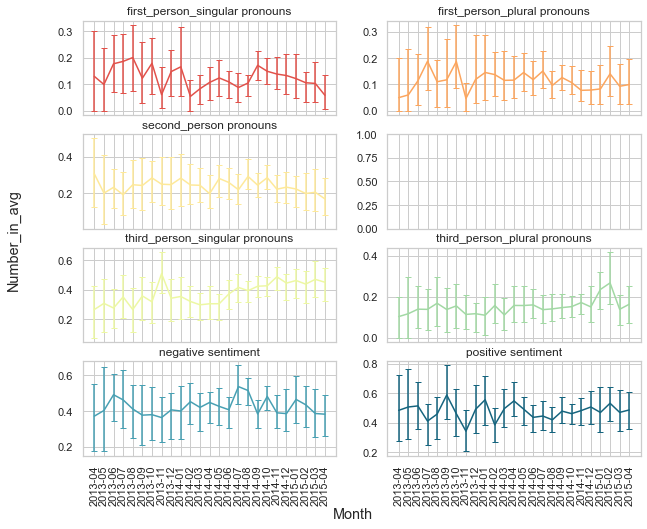

In [109]:
palette = sns.color_palette("Spectral")
palette = np.array(palette)
fig, ax = plt.subplots(4,2,figsize= (10,8), sharey=False, sharex = True)
fig.supxlabel('Month')
fig.supylabel('Number_in_avg')
#'Monthly average number of first_person_singular pronouns in winner and loser headlines'
sbplt = ax[0, 0]
sbplt.errorbar(fps_by_time.index, fps_by_time.first_person_singular1_avg, yerr = [fps_by_time.first_person_singular1_avg-fps_by_time.win_left,fps_by_time.win_right-fps_by_time.first_person_singular1_avg], capsize=3, label='avg_num_win', color=palette[0])

sbplt.set_title('first_person_singular pronouns')

#'Monthly average number of first_person_plural pronouns in winner and loser headlines'
sbplt = ax[0, 1]
sbplt.errorbar(fpp_by_time.index, fpp_by_time.first_person_plural1_avg, yerr = [fpp_by_time.first_person_plural1_avg-fpp_by_time.win_left,fpp_by_time.win_right-fpp_by_time.first_person_plural1_avg], capsize=3, label='avg_num_win', color=palette[1])

sbplt.set_title('first_person_plural pronouns')

#'Monthly average number of second_person pronouns in winner and loser headlines'
sbplt = ax[1, 0]
sbplt.errorbar(sp_by_time.index, sp_by_time.second_person1_avg, yerr = [sp_by_time.second_person1_avg-sp_by_time.win_left,sp_by_time.win_right-sp_by_time.second_person1_avg], capsize=3, label='avg_num_win', color=palette[2])

sbplt.set_title('second_person pronouns')

#'Monthly average number of third_person_singular pronouns in winner and loser headlines'
sbplt = ax[2, 0]
sbplt.errorbar(tps_by_time.index, tps_by_time.third_person_singular1_avg, yerr = [tps_by_time.third_person_singular1_avg-tps_by_time.win_left,tps_by_time.win_right-tps_by_time.third_person_singular1_avg], capsize=3, label='avg_num_win', color=palette[3])

sbplt.set_title('third_person_singular pronouns')

# A blank part for beauty.

#'Monthly average number of third_person_plural pronouns in winner and loser headlines'
sbplt = ax[2, 1]
sbplt.errorbar(tpp_by_time.index, tpp_by_time.third_person_plural1_avg, yerr = [tpp_by_time.third_person_plural1_avg-tpp_by_time.win_left,tpp_by_time.win_right-tpp_by_time.third_person_plural1_avg], capsize=3, label='avg_num_win', color=palette[4])

sbplt.set_title('third_person_plural pronouns')

#Negative sentiment
sbplt = ax[3, 0]
sbplt.errorbar(neg_by_time.index, neg_by_time.negative_words1_avg, yerr = [neg_by_time.negative_words1_avg-neg_by_time.win_left,neg_by_time.win_right-neg_by_time.negative_words1_avg], capsize=3, label='avg_num_win', color=palette[5])

sbplt.set_title('negative sentiment')

sbplt.tick_params(axis='x', rotation=90)

#Positive sentiment
sbplt = ax[3, 1]
sbplt.errorbar(pos_by_time.index, pos_by_time.positive_words1_avg, yerr = [pos_by_time.positive_words1_avg-pos_by_time.win_left,pos_by_time.win_right-pos_by_time.positive_words1_avg], capsize=3, label='avg_num_win', color=palette[5]**2)

sbplt.set_title('positive sentiment')

sbplt.tick_params(axis='x', rotation=90)

### 4.3 Discuss: Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

answer: The type of headline has changed, this is likely to be producing more engaging headlines.

### 4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

In [54]:
t1 = new_dataset[new_dataset.date_created < '2014-05-01 00:00:00'].copy()
t2 = new_dataset[(new_dataset.date_created >= '2014-04-01 00:00:00')].copy()
t1 = t1[~(t1.date_created < '2013-04-01 00:00:00')]

In [55]:
t1.head()

,headline1,ctr1,date_created,numwords1,first_person_singular1,first_person_plural1,second_person1,third_person_singular1,third_person_plural1,positive1,...,headline2,ctr2,numwords2,first_person_singular2,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive2,negative2
45,How Much Would Minimum Wagers Be Making RIGHT ...,0.013884,2013-05-18 19:14:14,16,0,0,0,0,0,1,...,If $23 Dollars An Hour Sounds Like A Lotta Dou...,0.004795,13,0,0,0,0,0,1,0
46,How Much Would You Be Making If Wages Had Kept...,0.014604,2013-05-18 19:14:15,16,0,0,1,0,0,0,...,How Much Would Minimum Wagers Be Making RIGHT ...,0.013884,16,0,0,0,0,0,1,0
47,How Much Would You Be Making If Wages Had Kept...,0.014604,2013-05-18 19:14:15,16,0,0,1,0,0,0,...,If $23 Dollars An Hour Sounds Like A Lotta Dou...,0.004795,13,0,0,0,0,0,1,0
48,I Was Shocked When I Saw This Sentence And Sad...,0.017117,2013-05-18 19:18:04,15,1,0,0,1,0,0,...,How Much Would Minimum Wagers Be Making RIGHT ...,0.013884,16,0,0,0,0,0,1,0
49,I Was Shocked When I Saw This Sentence And Sad...,0.017117,2013-05-18 19:18:04,15,1,0,0,1,0,0,...,How Much Would You Be Making If Wages Had Kept...,0.014604,16,0,0,1,0,0,0,0


In [56]:
t2.head()

,headline1,ctr1,date_created,numwords1,first_person_singular1,first_person_plural1,second_person1,third_person_singular1,third_person_plural1,positive1,...,headline2,ctr2,numwords2,first_person_singular2,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive2,negative2
2945,There's A World War Happening Online Right Now...,0.005252,2014-04-05 03:50:15.713,16,0,0,1,1,0,1,...,There's A Global Daily Fight Between Good Guys...,0.004511,16,0,0,1,1,0,1,1
2946,There's A World War Happening Online Right Now...,0.005252,2014-04-05 03:50:15.713,16,0,0,1,1,0,1,...,Afraid Of Robots? You Should Be. They're Real ...,0.002778,17,0,0,1,0,1,1,1
2947,There's A Global Daily Fight Between Good Guys...,0.004511,2014-04-05 03:51:49.677,16,0,0,1,1,0,1,...,Afraid Of Robots? You Should Be. They're Real ...,0.002778,17,0,0,1,0,1,1,1
2948,"No, You're Not The Target. But The Hit Men May...",0.005866,2014-04-05 03:57:20.13,17,0,0,1,0,0,0,...,There's A World War Happening Online Right Now...,0.005252,16,0,0,1,1,0,1,0
2949,"No, You're Not The Target. But The Hit Men May...",0.005866,2014-04-05 03:57:20.13,17,0,0,1,0,0,0,...,There's A Global Daily Fight Between Good Guys...,0.004511,16,0,0,1,1,0,1,1


### 4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

I'll use a hypothesis test

In [57]:
from statsmodels.stats import diagnostic
from scipy import stats

In [58]:
# test length
test_length1 = stats.ttest_ind(t1.numwords1, t2.numwords1)
test_length2 = stats.ttest_ind(t1.numwords2, t2.numwords2)
print(test_length1)
print(test_length2)
print('Since both pvalue are very small, we can reject that the means are the same, so there are changes')

Ttest_indResult(statistic=-15.21985774768728, pvalue=5.45205571785121e-52)
Ttest_indResult(statistic=-14.547621182886864, pvalue=1.1190329549556712e-47)
Since both pvalue are very small, we can reject that the means are the same, so there are changes


In [59]:
# test pronouns
test_pronouns = stats.ttest_ind(t1.third_person_plural1, t2.third_person_plural1)
print(test_pronouns)
test_pronouns = stats.ttest_ind(t1.third_person_plural2, t2.third_person_plural2)
print(test_pronouns)
print('Third_person_plural pronoun usage really increased in the winner headlines.')

Ttest_indResult(statistic=-3.464448685762777, pvalue=0.00053254113575839)
Ttest_indResult(statistic=-5.214819865599178, pvalue=1.860069943646109e-07)
Third_person_plural pronoun usage really increased in the winner headlines.


In [60]:
test_neg = stats.ttest_ind(t1.negative1, t2.negative1)
print(test_neg)
test_neg = stats.ttest_ind(t1.negative2, t2.negative2)
print(test_neg)

Ttest_indResult(statistic=0.07094799181413085, pvalue=0.9434399261839539)
Ttest_indResult(statistic=-4.834570538756969, pvalue=1.3452113758466845e-06)


In [61]:
test_positive = stats.ttest_ind(t1.positive1, t2.positive1)
print(test_positive)
test_positive = stats.ttest_ind(t1.positive2, t2.positive2)
print(test_positive)

Ttest_indResult(statistic=0.5663131352601131, pvalue=0.571187906693809)
Ttest_indResult(statistic=0.33218707061289965, pvalue=0.7397518267774061)


### 4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period?

Reason1: People studied the winner headlines' features and then used them more and more frequently, so that the change could happen.
Reason2:

Remains the same?

### 4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

In [79]:
w_l_positive = new_dataset.loc[(new_dataset.positive1!=0) & (new_dataset.positive2!=0)]
w_l_negative = new_dataset.loc[(new_dataset.negative1!=0) & (new_dataset.negative2!=0)]
w_l_negative.shape
w_l_positive.shape

(4898, 21)

In [63]:
w_n_fps_count = w_l_negative.first_person_singular1.mean()
print(w_n_fps_count)
l_n_fps_count = w_l_negative.first_person_singular2.mean()
print(l_n_fps_count)
test = stats.ttest_ind(w_l_negative.first_person_singular1,w_l_negative.first_person_singular2)
print(f'since the p-value is {test.pvalue} we cannot reject the observation that the mean is equal.\nSo people may dislike headlines with negative words and first person pronouns (you are awful!) is true is the significance value is relatively small')

0.13607936165624326
0.12249299115807634
since the p-value is 0.05120577289851412 we cannot reject the observation that the mean is equal.
So people may dislike headlines with negative words and first person pronouns (you are awful!) is true is the significance value is relatively small


In [64]:
w_p_fps_count = w_l_positive.first_person_singular1.mean()
print(w_p_fps_count)
l_p_fps_count = w_l_positive.first_person_singular2.mean()
print(l_p_fps_count)
test = stats.ttest_ind(w_l_positive.first_person_singular1,w_l_positive.first_person_singular2)
print(f'since the p-value is {test.pvalue} we cannot reject the observation that the mean is equal.\nSo people may like first person singular pronouns in headlines containing positive words (you are amazing!) is not true')

0.1384238464679461
0.1282155982033483
since the p-value is 0.13726173727839738 we cannot reject the observation that the mean is equal.
So people may like first person singular pronouns in headlines containing positive words (you are amazing!) is not true


### 4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**?

### 4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines.
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text.

In [98]:
# for positive set:
mean_positive_1 = w_l_positive['first_person_singular1'].mean()
mean_positive_2 = w_l_positive['first_person_singular2'].mean()
print(f'mean for winner and loser headline in the positive dataset are {mean_positive_1}, {mean_positive_2} respectively')

mean for winner and loser headline in the positive dataset are 0.1384238464679461, 0.1282155982033483 respectively


In [106]:
stats.ttest_rel(w_l_positive['first_person_singular1'], w_l_positive['first_person_singular2'])

Ttest_relResult(statistic=1.717348679177252, pvalue=0.0859787087147582)

In [107]:
stats.ttest_ind(w_l_positive['first_person_singular1'], w_l_positive['first_person_singular2'])

Ttest_indResult(statistic=1.4861874387739795, pvalue=0.13726173727839738)

In [101]:
# for negative set:
mean_negative_1 = w_l_negative['first_person_singular1'].mean()
mean_negative_2 = w_l_negative['first_person_singular2'].mean()
print(f'mean for winner and loser headline in the negative dataset are {mean_negative_1}, {mean_negative_2} respectively')

mean for winner and loser headline in the negative dataset are 0.13607936165624326, 0.12249299115807634 respectively


In [105]:
stats.ttest_rel(w_l_negative['first_person_singular1'], w_l_negative['first_person_singular2'])

Ttest_relResult(statistic=2.387504257343137, pvalue=0.017003031867072516)

In [108]:
stats.ttest_ind(w_l_negative['first_person_singular1'], w_l_negative['first_person_singular2'])

Ttest_indResult(statistic=1.9500037174056994, pvalue=0.05120577289851412)